# Image retrieval using k Nearest Neighbours algo on deep features which have been extracted using the Imagenet model

In [1]:
import turicreate as tc

In [2]:
train_images = tc.SFrame('image_train_data')
test_images = tc.SFrame('image_test_data')

### Summary characteristics on training images

In [3]:
sketch = tc.Sketch(train_images['label'])

In [4]:
sketch.frequent_items()

{'bird': 478, 'cat': 509, 'dog': 509, 'automobile': 509}

In [5]:
train_cats = train_images[train_images['label']=='cat']
train_dogs = train_images[train_images['label']=='dog']
train_birds = train_images[train_images['label']=='bird']
train_cars = train_images[train_images['label']=='automobile']

In [6]:
cat_model = tc.nearest_neighbors.create(train_cats,features=['deep_features'],label='id')
dog_model = tc.nearest_neighbors.create(train_dogs,features=['deep_features'],label='id')
bird_model = tc.nearest_neighbors.create(train_birds,features=['deep_features'],label='id')
car_model = tc.nearest_neighbors.create(train_cars,features=['deep_features'],label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [17]:
def get_images_from_ids(query_result):
    return train_images.filter_by(query_result['reference_label'],'id')

In [18]:
first_image = test_images[0:1]

,SArray
0,

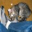

In [19]:
first_image['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 30.388ms     |

| Done         |         | 100         | 180.397ms    |

+--------------+---------+-------------+--------------+

,SArray
0,

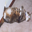

In [21]:
get_images_from_ids(cat_model.query(first_image,k=1))['image'].explore()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 27.552ms     |

| Done         |         | 100         | 175.772ms    |

+--------------+---------+-------------+--------------+

,SArray
0,

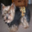

In [22]:
get_images_from_ids(dog_model.query(first_image,k=1))['image'].explore()

In [23]:
cat_model.query(first_image)['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 28.142ms     |

| Done         |         | 100         | 190.569ms    |

+--------------+---------+-------------+--------------+

36.15573070978294

In [24]:
dog_model.query(first_image)['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 23.455ms     |

| Done         |         | 100         | 186.153ms    |

+--------------+---------+-------------+--------------+

37.77071136184157

In [25]:
test_cats = test_images[test_images['label']=='cat']
test_dogs = test_images[test_images['label']=='dog']
test_birds = test_images[test_images['label']=='bird']
test_cars = test_images[test_images['label']=='automobile']

In [26]:
dog_cat = cat_model.query(test_dogs,k=1)
dog_dog = dog_model.query(test_dogs,k=1)
dog_bird = bird_model.query(test_dogs,k=1)
dog_car = car_model.query(test_dogs,k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 1

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 509000  | 100         | 891.074ms    |

| Done         | 509000  | 100         | 904.667ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 1

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 509000  | 100         | 897.319ms    |

| Done         | 509000  | 100         | 906.743ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 1

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 478000  | 100         | 945.321ms    |

| Done         | 478000  | 100         | 952.563ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 1

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 509000  | 100         | 788.747ms    |

| Done         | 509000  | 100         | 796.277ms    |

+--------------+---------+-------------+--------------+

In [27]:
dog_distance_frame = tc.SFrame({'dog_cat':dog_cat['distance'],'dog_dog':dog_dog['distance'],'dog_bird':dog_bird['distance'],'dog_car':dog_car['distance']})

In [28]:
def is_correct_dog(row):
    if(row['dog_dog'] < row['dog_cat'] and row['dog_dog'] < row['dog_bird'] and row['dog_dog'] < row['dog_car']):
        return 1
    else:
        return 0

In [30]:
dog_distance_frame.apply(is_correct_dog).sum()/dog_distance_frame.num_rows()

0.678